<a href="https://colab.research.google.com/github/DanialQureshi26/ML-Projects/blob/main/Skin_Disease_Classification_Using_TensorFlow_undone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/My Drive/skin disease')


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing your dataset
dataset_dir = '/content/drive/My Drive/skin disease'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32




In [ ]:
# Create an ImageDataGenerator instance for loading and preprocessing images
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
)


In [ ]:
# Load and preprocess the images
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 924 images belonging to 8 classes.


In [ ]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X, y = next(data_generator)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 2.0986 - accuracy: 0.0800 - val_loss: 2.6152 - val_accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 76ms/step - loss: 2.2969 - accuracy: 0.2400 - val_loss: 1.9796 - val_accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 0s 71ms/step - loss: 2.0542 - accuracy: 0.1600 - val_loss: 2.0340 - val_accuracy: 0.2857
Epoch 4/10
1/1 [==============================] - 0s 74ms/step - loss: 2.0205 - accuracy: 0.0800 - val_loss: 2.0492 - val_accuracy: 0.2857
Epoch 5/10
1/1 [==============================] - 0s 72ms/step - loss: 2.0326 - accuracy: 0.2800 - val_loss: 2.0621 - val_accuracy: 0.1429
Epoch 6/10
1/1 [==============================] - 0s 74ms/step - loss: 1.9568 - accuracy: 0.2800 - val_loss: 2.1038 - val_accuracy: 0.1429
Epoch 7/10
1/1 [==============================] - 0s 79ms/step - loss: 1.9587 - accuracy: 0.2400 - val_loss: 2.0783 - val_accuracy: 0.1429
Epoch 8/10
1/1 [=============

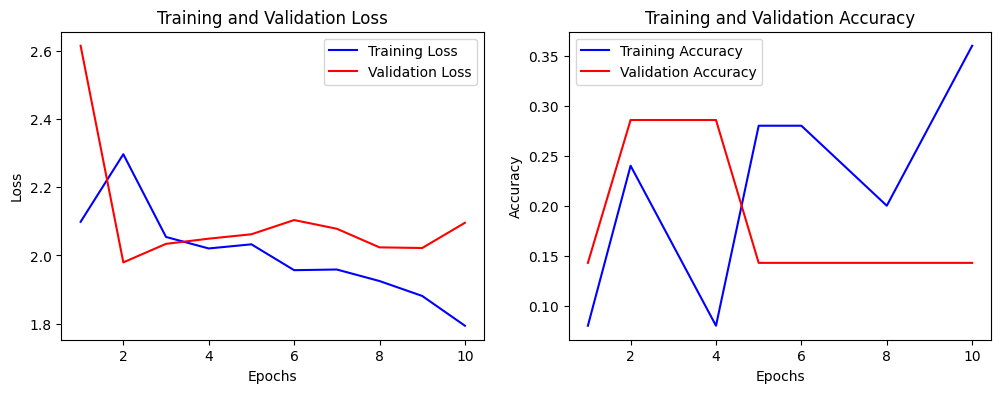

In [ ]:
import matplotlib.pyplot as plt

# Get training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 0s 28ms/step - loss: 2.0958 - accuracy: 0.1429
Test Loss: 2.0957753658294678
Test Accuracy: 0.1428571492433548


In [ ]:
# Define the directory containing your dataset
dataset_dir = '/content/drive/My Drive/skin disease'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
# Load and preprocess the images
data_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)


Found 924 images belonging to 8 classes.


In [ ]:
# Split the dataset into training and test sets
X, y = next(data_generator)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.0738 - accuracy: 0.1600 - val_loss: 2.4327 - val_accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 90ms/step - loss: 2.2623 - accuracy: 0.1600 - val_loss: 2.1898 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 101ms/step - loss: 2.0729 - accuracy: 0.1200 - val_loss: 2.1576 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 1.9907 - accuracy: 0.2000 - val_loss: 2.1672 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 94ms/step - loss: 1.9528 - accuracy: 0.2800 - val_loss: 2.2505 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 88ms/step - loss: 1.8664 - accuracy: 0.2000 - val_loss: 2.2389 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 84ms/step - loss: 1.6835 - accuracy: 0.6000 - val_loss: 2.2331 - val_accuracy: 0.0000e+00
Epoc

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 43ms/step - loss: 3.0289 - accuracy: 0.0000e+00
Test Loss: 3.0288760662078857
Test Accuracy: 0.0


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the directory containing your dataset
dataset_dir = '/content/drive/My Drive/skin disease'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Get the list of all image file paths and their corresponding labels
data = []
labels = []
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        data.append(img_path)
        labels.append(category)

# Convert to DataFrame
df = pd.DataFrame({
    'filename': data,
    'class': labels
})

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(dataset_dir)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 739 validated image filenames belonging to 8 classes.
Found 185 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/10
23/23 [==============================] - 257s 11s/step - loss: 4.8246 - accuracy: 0.2249 - val_loss: 1.5773 - val_accuracy: 0.3625
Epoch 2/10
23/23 [==============================] - 13s 571ms/step - loss: 1.6117 - accuracy: 0.4045 - val_loss: 1.2471 - val_accuracy: 0.6438
Epoch 3/10
23/23 [==============================] - 13s 563ms/step - loss: 1.3584 - accuracy: 0.4880 - val_loss: 0.9964 - val_accuracy: 0.6750
Epoch 4/10
23/23 [==============================] - 14s 590ms/step - loss: 1.2885 - accuracy: 0.5248 - val_loss: 0.9664 - val_accuracy: 0.6687
Epoch 5/10
23/23 [==============================] - 16s 705ms/step - loss: 1.1637 - accuracy: 0.5969 - val_loss: 0.9148 - val_accuracy: 0.6750
Epoch 6/10
23/23 [==============================] - 15s 671ms/step - loss: 1.1945 - accuracy: 0.5714 - val_loss: 0.9184 - val_accuracy: 0.7250
Epoch 7/10
23/23 [==============================] - 13s 562ms/step - loss: 1.1

In [21]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the directory containing your dataset
dataset_dir = '/content/drive/My Drive/skin disease'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)

# Get the list of all image file paths and their corresponding labels
data = []
labels = []
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        data.append(img_path)
        labels.append(category)

# Convert to DataFrame
df = pd.DataFrame({
    'filename': data,
    'class': labels
})

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(dataset_dir)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 739 validated image filenames belonging to 8 classes.
Found 185 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/10
23/23 [==============================] - 23s 838ms/step - loss: 5.4527 - accuracy: 0.1924 - val_loss: 1.6074 - val_accuracy: 0.4938
Epoch 2/10
23/23 [==============================] - 13s 581ms/step - loss: 1.7414 - accuracy: 0.3777 - val_loss: 1.3518 - val_accuracy: 0.6375
Epoch 3/10
23/23 [==============================] - 14s 618ms/step - loss: 1.6395 - accuracy: 0.3734 - val_loss: 1.2362 - val_accuracy: 0.6438
Epoch 4/10
23/23 [==============================] - 14s 595ms/step - loss: 1.5689 - accuracy: 0.4328 - val_loss: 1.1675 - val_accuracy: 0.6750
Epoch 5/10
23/23 [==============================] - 14s 596ms/step - loss: 1.4234 - accuracy: 0.4936 - val_loss: 1.1710 - val_accuracy: 0.6687
Epoch 6/10
23/23 [==============================] - 14s 603ms/step - loss: 1.3812 - accuracy: 0.4922 - val_loss: 1.0624 - val_accuracy: 0.6875
Epoch 7/10
23/23 [==============================] - 13s 560ms/step - loss: 1.3820 - accuracy: 0.4781 - val_loss: 0.9896 - val_accuracy: 0.7188

In [22]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the directory containing your dataset
dataset_dir = '/content/drive/My Drive/skin disease'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)

# Get the list of all image file paths and their corresponding labels
data = []
labels = []
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        data.append(img_path)
        labels.append(category)

# Convert to DataFrame
df = pd.DataFrame({
    'filename': data,
    'class': labels
})

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(dataset_dir)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 739 validated image filenames belonging to 8 classes.
Found 185 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 15s 552ms/step - loss: 4.3678 - accuracy: 0.2188 - val_loss: 1.5888 - val_accuracy: 0.3812
Epoch 2/20
23/23 [==============================] - 13s 579ms/step - loss: 1.7004 - accuracy: 0.3748 - val_loss: 1.3521 - val_accuracy: 0.5375
Epoch 3/20
23/23 [==============================] - 13s 541ms/step - loss: 1.5669 - accuracy: 0.4229 - val_loss: 1.2481 - val_accuracy: 0.5312
Epoch 4/20
23/23 [==============================] - 12s 524ms/step - loss: 1.5267 - accuracy: 0.4356 - val_loss: 1.0759 - val_accuracy: 0.6938
Epoch 5/20
23/23 [==============================] - 13s 556ms/step - loss: 1.4842 - accuracy: 0.4724 - val_loss: 1.0936 - val_accuracy: 0.6750
Epoch 6/20
23/23 [==============================] - 13s 581ms/step - loss: 1.3942 - accuracy: 0.4682 - val_loss: 1.0132 - val_accuracy: 0.6875
Epoch 7/20
23/23 [==============================] - 13s 579ms/step - loss: 1.2901 - accuracy: 0.5375 - val_loss: 0.9050 - val_accuracy: 0.6875

In [23]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the directory containing your dataset
dataset_dir = '/content/drive/My Drive/skin disease'

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)

# Get the list of all image file paths and their corresponding labels
data = []
labels = []
for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        data.append(img_path)
        labels.append(category)

# Convert to DataFrame
df = pd.DataFrame({
    'filename': data,
    'class': labels
})

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(os.listdir(dataset_dir)), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 739 validated image filenames belonging to 8 classes.
Found 185 validated image filenames belonging to 8 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/20
23/23 [==============================] - 37s 747ms/step - loss: 2.1675 - accuracy: 0.1570 - val_loss: 2.0113 - val_accuracy: 0.2062 - lr: 1.0000e-04
Epoch 2/20
23/23 [==============================] - 16s 685ms/step - loss: 1.9882 - accuracy: 0.2291 - val_loss: 1.7788 - val_accuracy: 0.3063 - lr: 1.0000e-04
Epoch 3/20
23/23 [==============================] - 17s 709ms/step - loss: 1.8454 - accuracy: 0.2673 - val_loss: 1.5478 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 4/20
23/23 [==============================] - 16s 684ms/step - loss: 1.6426 - accuracy: 0.3734 - val_loss: 1.7579 - val_accuracy: 0.4125 - lr: 1.0000e-04
Epoch 5/20
23/23 [==============================] - 16s 680ms/step - loss: 1.5575 - accuracy: 0.4031 - val_loss: 1.3108 - val_accuracy: 0.5437 - lr: 1.0000e-04
Epoch 6/20
23/23 [==============================] - 16s 688ms/step - loss: 1.3538 - accuracy: 0.4986 - val_loss: 1.0201 - val_accuracy: 0.6313 - lr: 1.0000e-04
Epoch 7/20
23/23 [======================

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, img_width, img_height):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Scale pixel values to [0, 1]
    return img_array

# Function to predict the disease from an image
def predict_disease(image_path, model, class_indices):
    # Preprocess the image
    img_array = preprocess_image(image_path, img_width, img_height)

    # Make a prediction
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_idx = np.argmax(predictions, axis=1)[0]

    # Map the predicted class index to the disease name
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_class = class_labels[predicted_class_idx]

    return predicted_class

# Example usage
image_path = '/content/drive/MyDrive/test image 2.jpeg'  # Replace with the path to your image
predicted_disease = predict_disease(image_path, model, train_generator.class_indices)
print("Predicted disease:", predicted_disease)


1/1 [==============================] - 0s 28ms/step
Predicted disease: PA-cutaneous-larva-migrans
